<img src="assets/Credit Card.png" style="display:block; margin:auto" width=350>

<h1><center>Project: Credit Card Customer Segmentation</center></h1>

#### Introduction
In this guided project, we’ll play the role of a data scientist working for a credit card company. The idea of the project is similar to what we've done during the course, but now we're using a different dataset with more variables. The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

#### Steps
In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

- Analyze the dataset;
- Prepare the data for modeling;
- Find an appropriate number of clusters;
- Segment the data;
- Interpret and explain the results.

#### Data
Here's the data dictionary:

- `customer_id`: unique identifier for each customer.
- `age: customer age in years`.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.

#### Goal
The goal of this project is to perform customer segmentation on a dataset of credit card customers. By applying clustering techniques, we can identify distinct groups of customers based on their behavior and attributes, which can be useful for targeted marketing strategies, customer service improvements, and risk management.


*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [36]:
# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

# Set visualization parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [37]:
# Read data
customer = pd.read_csv('customer_segmentation.csv')

# Shape of data
customer.shape

(10127, 14)

In [38]:
# Print data information
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [39]:
#Check head of dataset
customer.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [40]:
# Calculate correlations of numeric values
customer.corr(numeric_only=True)

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


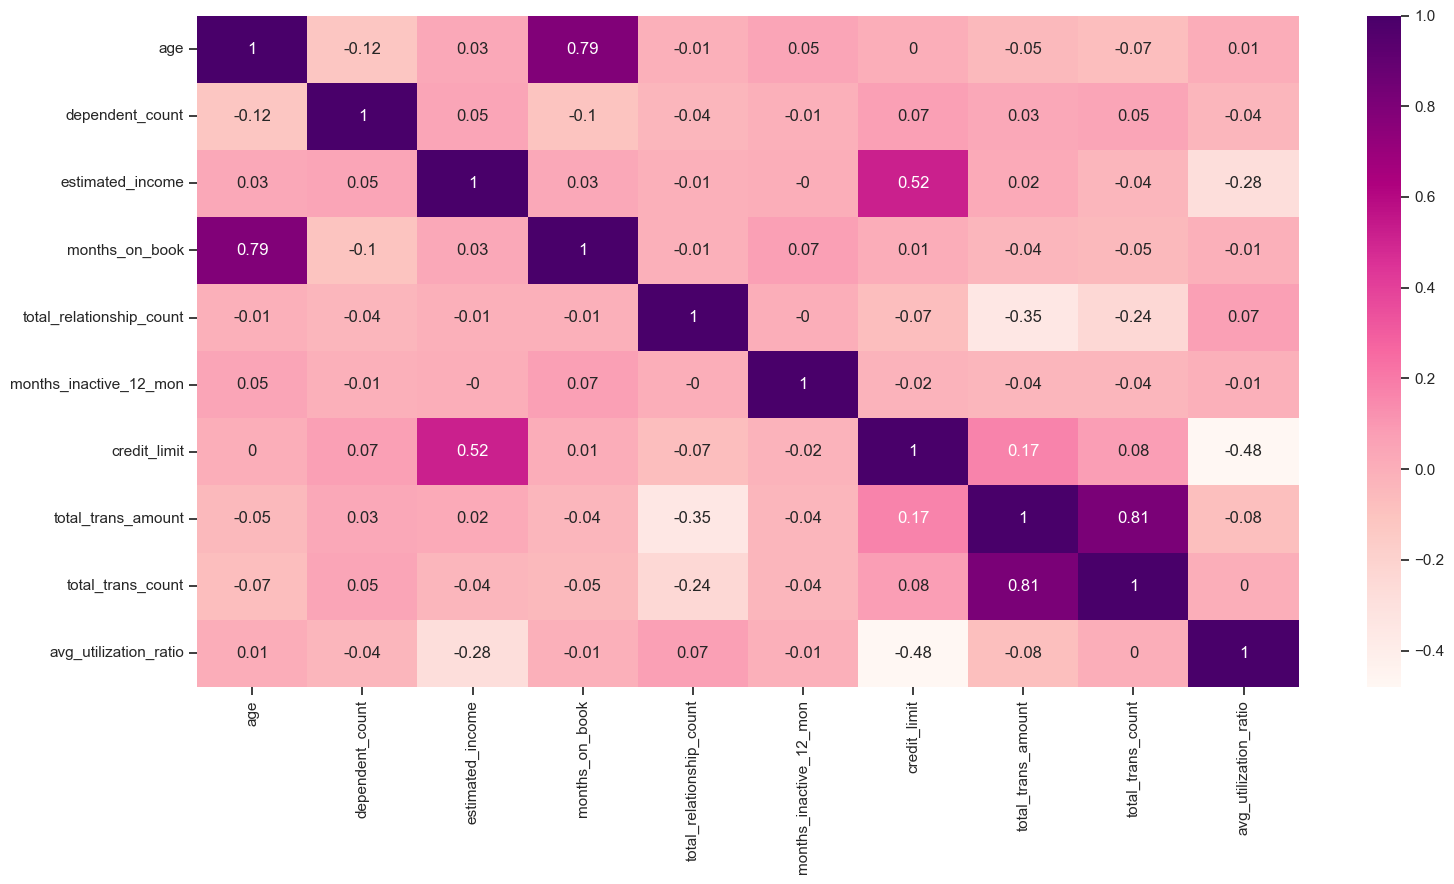

In [41]:
# Create a figure and a single subplot with a specified figure size of 12x8 inches
fig, ax = plt.subplots(figsize=(16, 9))

# Compute the correlation matrix of the DataFrame 'customer', excluding the 'customer_id' column
# Round the correlation values to 2 decimal places for better readability
# Create a heatmap using seaborn to visualize the correlation matrix
# 'cmap' sets the color map to 'Blues' for the heatmap
# 'annot=True' adds the correlation coefficient values to each cell in the heatmap
sns.heatmap(round(customer.drop('customer_id', axis=1).corr(numeric_only=True), 2), cmap='RdPu', annot=True, ax=ax)

# Adjust subplot parameters to fit the figure area and prevent overlapping content
plt.tight_layout()

# Render and display the figure with the heatmap
plt.show()

Above we calculated correlations between the numeric values:

- There is a strong positive correlation (0.789) between the `age` of customers and the length of time they have been customers (`months_on_book`). Older customers tend to be customers for longer. Which is also somewhat logical, the older you get, the longer you are a customer if you do not change banks
- There is a moderate positive correlation (0.516) between `estimated income` and customers' `credit limit`. Customers with higher incomes tend to have higher credit limits.
- There is a very weak positive correlation (0.052) between the `number of dependents` and `estimated income`. However, this is a very weak relationship and may not be significant.
- There is virtually no correlation (0.007) between the `age` of customers and their `average utilization ratio` (ratio of used to available credit).
- There is a moderate negative correlation (-0.482) between `credit limit` and `average utilization ratio`. Customers with higher credit limits tend to use a lower percentage of their available credit.

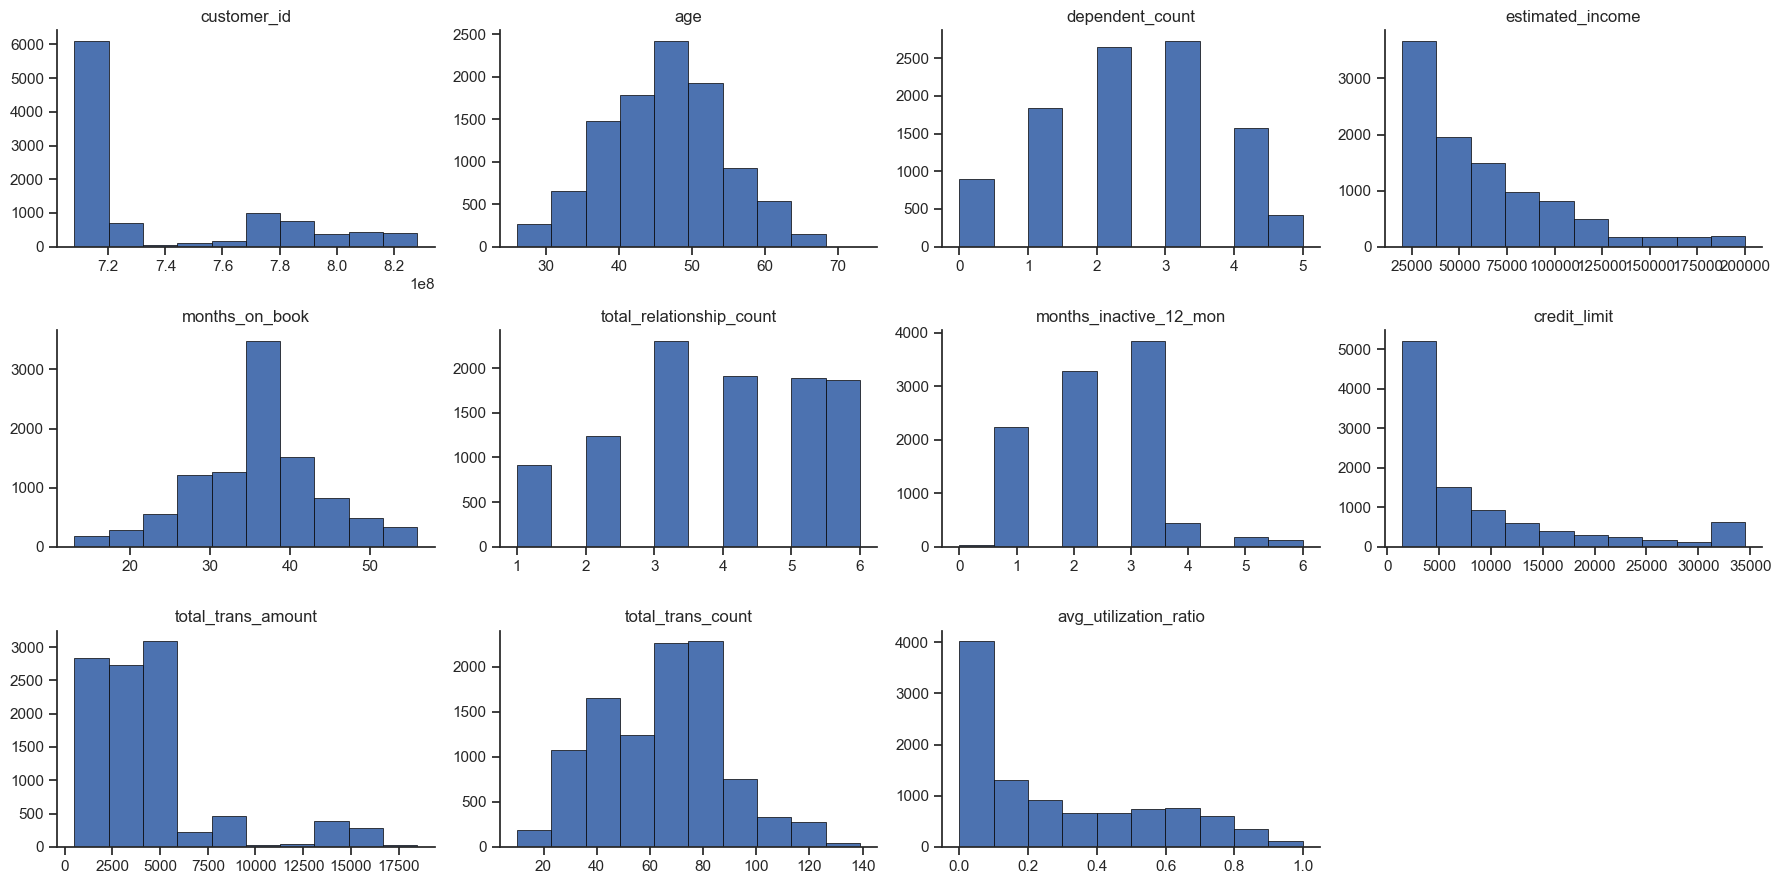

In [42]:
# Save numeric values in numerics
numerics = [col for col in customer.columns if customer[col].dtype in ['int64', 'float64']]

# plot all numeric values in subplots
plt.figure(figsize=(18, 9))
for i, column in enumerate(numerics):
    plt.subplot(3, 4, i+1)
    plt.hist(customer[column], lw=0.5, ec="black")
    plt.title(column)
    
plt.tight_layout()        
plt.show()

After we familiarize ourselves with the dataset, we can answer the following questions:
1. How big is the dataset? How many columns does it have?
   - The dataset does have 10127 rows and 14 columns
2. What's the type of data contained in each column? Are there many categorical variables? How are we dealing with them?
   - There are 11 int or float type columns and 3 object type columns. The object type column can be transformed to dummy variables, so we can use them in later analysis
3. Are there any missing values?
   - The dataset does not contain any missing value
4. Analysing the distribution of each numeric column: The plot above does show the distribution of every numeric column.
   - The `age` column is nearly a normal distribution, slightly skewed to the right, with most values at age about 40-60.
   - The `estimated income` column is right skewed. Most clients have an estimated income between 25,000 and 50,000.
   - Most customers have up to 60 transactions, distribution is unimodal and right-skewed (`total_trans_count`).
   - Most customers have transaction amounts up to 5,000, the distribution is right-skewed (`total_trans_amount`).
   - Most customers have a credit limit of less than 10,000 and the distribution is strongly skewed to the right (`credit_limit`).
   - The `customer_ID` column is strongly skewed to the right. Since this is an ID, distribution is not relevant here.
   - Regarding the `months_inactive_12_mon` column, we can say that most customers were inactive for 3 months in the last 12 months.

#### Feature Engineering

Let's proceed with preprocessing the categorical columns in our dataset, focusing on `gender`, `education_level`, and `marital_status`.

- Gender Column
The `gender` column contains two unique values, 'M' and 'F'. Given its binary nature, we can efficiently encode this column using binary values: replacing 'M' with 1 and 'F' with 0.

- Education Level Column
The `education_level` column has six distinct values representing different levels of education. We can ordinally encode this column, assigning each education level a numerical value based on its rank from lowest to highest. This encoding respects the inherent order in educational attainment.

##### Process Overview:
Before implementing these transformations, we will create a copy of the original DataFrame. This approach ensures that the original data remains unaltered, allowing for comparative analysis post-transformation.

By working on a copied DataFrame, we maintain data integrity and facilitate better debugging and validation of our preprocessing steps.

In [43]:
# copy customer dataframe
customers_modif = customer.copy()
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [44]:
# replace M with 1 and F with 0
customers_modif['gender'] = customers_modif['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [45]:
# show values by gender
customers_modif['gender'].value_counts()

gender
0    5358
1    4769
Name: count, dtype: int64

In [46]:
# replace education level with numeric values
customers_modif['education_level'] = customers_modif['education_level'].map({'Uneducated': 0, 'High School': 1, 
                                                                             'College': 2, 'Graduate': 3,
                                                                             'Post-Graduate': 4, 'Doctorate': 5})

In [47]:
# show values of education level
customers_modif['education_level'].value_counts()

education_level
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: count, dtype: int64

#### Feature Engineering II

##### Marital Status Column

The marital_status column contains the following unique values:

- Single
- Married
- Divorced
- Unknown

Unlike the `education_level` column, the categories in the `marital_status` column do not have an inherent order or ranking. There's no objective way to say that "Single" is higher or better than "Married" or "Divorced."

Due to the nominal nature of these categories, we will apply one-hot encoding to transform this column into dummy variables. This technique creates binary columns for each category, allowing the model to process this information effectively without assuming any ordinal relationship.

In [48]:
# use get_dummies to create dummy variables
customers_modif = pd.get_dummies(customers_modif, columns=['marital_status'], drop_first=True) # drop_first=True avoid multicollinearity issues
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


Using the get_dummies function, we have created new columns for the marital_status categories: `marital_status_Married`, `marital_status_Single`, and `marital_status_Unknown`. One category (`marital_status_Divorced`) is omitted to avoid multicollinearity, as it serves as the baseline comparison for the other categories.

#### Data Scaling
It's important to note that our DataFrame contains features with vastly different scales. For example, the `estimated_income` column has values ranging from tens to hundreds of thousands, while the `dependent_count` column has values between 1 and 5.

To ensure that all features contribute equally to our analysis and modeling, we need to transform the data so that all features are on the same scale.e.

In [49]:
# Drop the customer_id column
customers_updated = customers_modif.drop(columns=['customer_id'])
customers_updated.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


In [50]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it, resulting in scaled features
scaled = scaler.fit_transform(customers_updated)

# Convert the scaled data back into a DataFrame for better readability and manipulation
scaled_df = pd.DataFrame(scaled, columns=customers_updated.columns)

# Display the scaled DataFrame
scaled_df[:5]

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


#### Choosing K

With the dataset preprocessed and scaled, we are now prepared for clustering analysis. The next task is to determine the optimal number of clusters using the inertia metric.

We'll systematically create multiple k-means models with varying cluster counts and compute the inertia (within-cluster sum of squares) for each model. By plotting the Elbow Curve showing the inertia values as a function of the number of clusters we can visually identify the optimal number of clusters.

After selecting the optimal number of clusters based on the Elbow Curve, we will proceed with the final clustering process to segment the customers effectively.

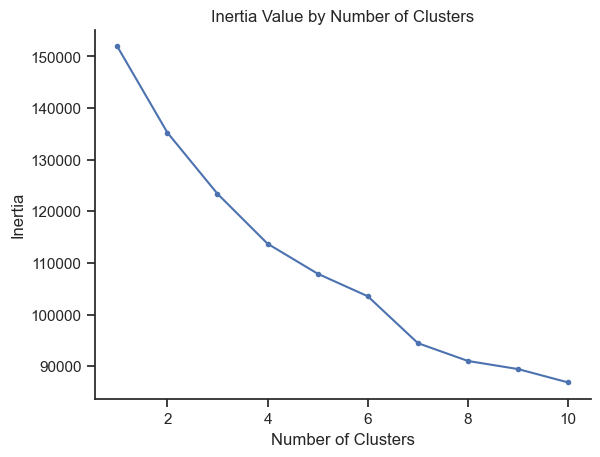

In [51]:
# Initialize an empty list to store the inertia values for different numbers of clusters
inertia = []

# Loop through a range of cluster numbers from 1 to 10
for k in range(1, 11):
    # Instantiate the KMeans model with the current number of clusters (k) and a fixed random seed for reproducibility
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data and predict cluster assignments
    # The fit_predict method returns the cluster labels for each data point
    clusters = model.fit_predict(scaled_df)
    
    # Append the inertia (within-cluster sum of squares) of the model to the inertia list
    inertia.append(model.inertia_)

# Plot the inertia values against the number of clusters
# The marker "." is used to visualize the data points on the plot
plt.plot(range(1, 11), inertia, marker=".")
plt.title('Inertia Value by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Here we can see, after 6 clusters the decrease is much lower, so 6 would be the best choice for the cluster count.

In [52]:
# Instantiate the KMeans model with 6 clusters and a fixed random seed for reproducibility
model = KMeans(n_clusters=6, random_state=42)

# Fit the KMeans model to the scaled dataset and assign each data point to a cluster
# The fit_predict method returns the cluster labels for each data point in the dataset
clusters = model.fit_predict(scaled_df)

# Output the cluster labels for each data point to the console
print(clusters)

[2 1 2 ... 0 5 0]


#### Analyzing Results

The final step involves interpreting the clustering results. We need to evaluate how the features vary across different clusters to understand the distinguishing characteristics of each cluster.

Identify and summarize the key attributes of each cluster, and assess their potential implications for business and marketing strategies. This analysis will help in tailoring strategies that align with the unique profiles of each customer segment.r.

In [53]:
# Add a new column 'CLUSTER' to the DataFrame 'customers_updated' to store cluster assignments
# The cluster labels are incremented by 1 to avoid having a cluster label of 0
customers_updated['CLUSTER'] = clusters + 1

# Display the frequency of each cluster assignment in the 'CLUSTER' column
# This will show how many customers are assigned to each cluster
customers_updated['CLUSTER'].value_counts()

CLUSTER
2    2411
1    2083
3    1718
6    1695
4    1252
5     968
Name: count, dtype: int64

We can see that cluster 2 is the largest while cluster 5 is the smallest.

Considering the numeric variable only, we'll check on the average value of each variable per cluster. We just need to group the data and plot a bar chart for each column.

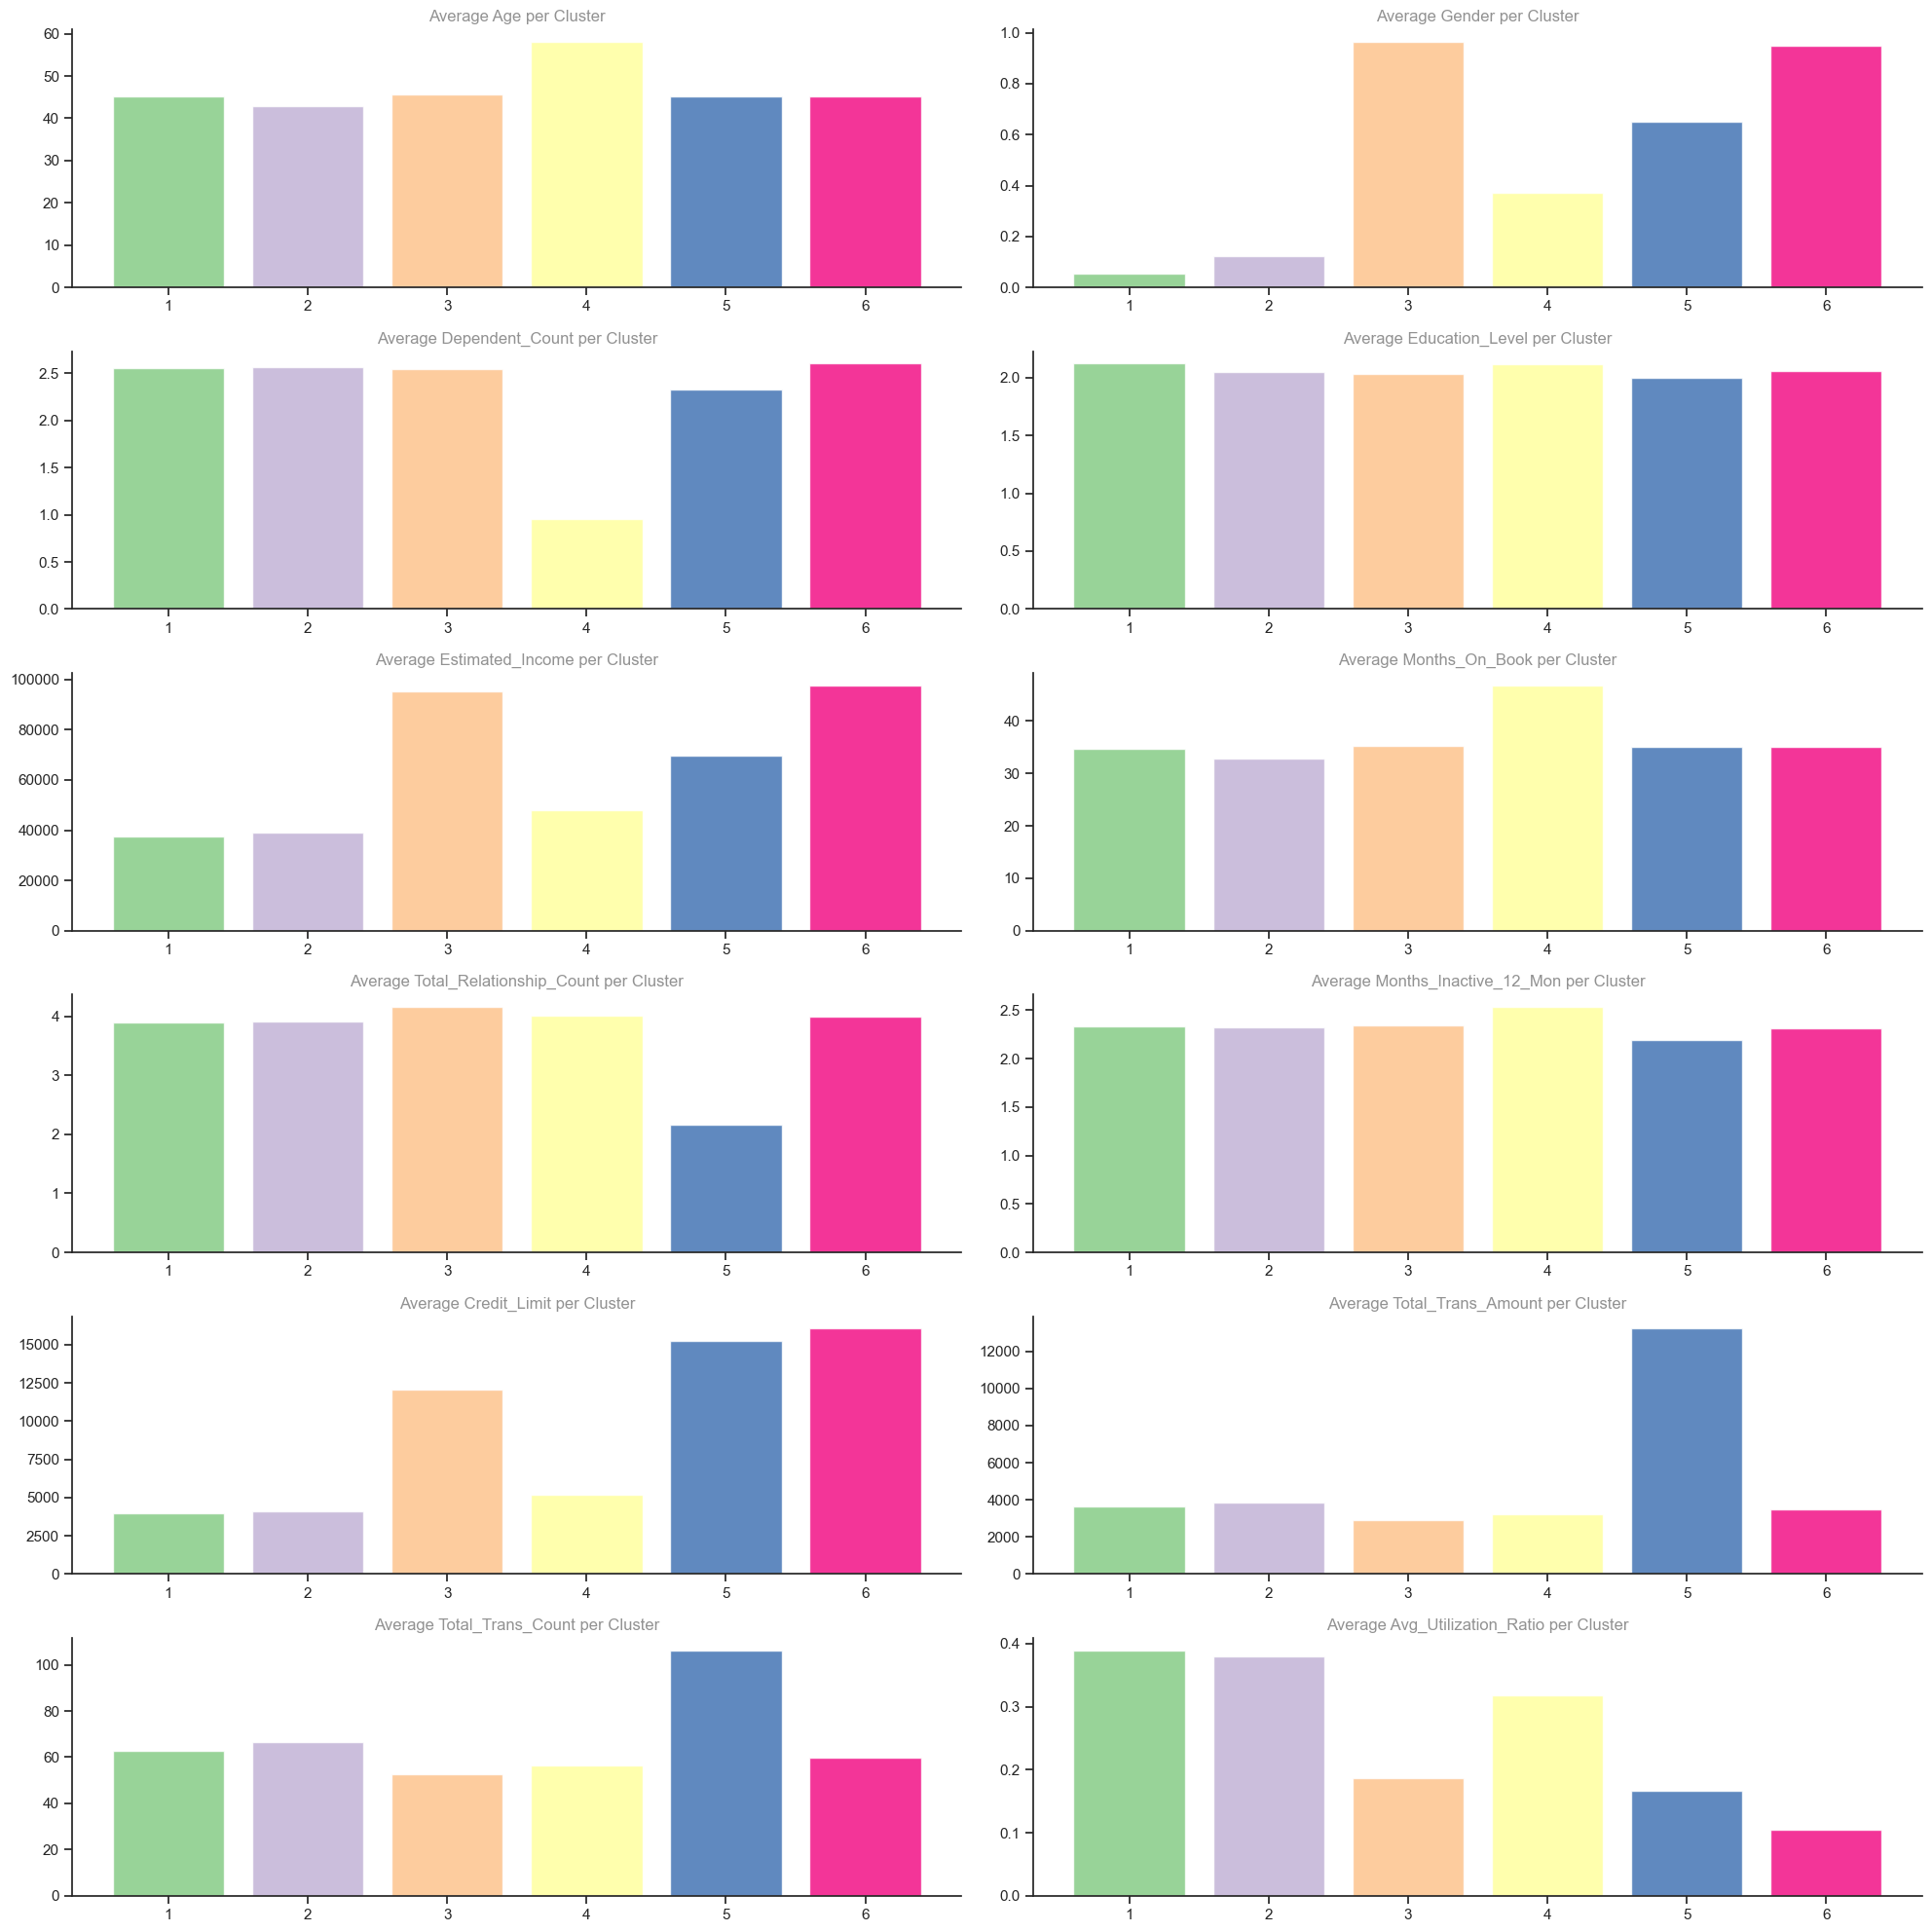

In [54]:
# Identify columns in the DataFrame that are of numeric data types (int64 or float64)
numerics = [col for col in customers_updated.columns if customers_updated[col].dtype in ['int64', 'float64']]

# Create subplots for visualizing each numeric feature's average value per cluster
# The number of rows is calculated to accommodate all numeric features, ensuring an extra row if needed
fig, axes = plt.subplots(nrows=(len(numerics) // 2) + (len(numerics) % 2), ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Iterate over each numeric column and its index
for i, column in enumerate(numerics):
    # Calculate the mean value of the numeric column for each cluster
    grouped = customers_updated.groupby('CLUSTER')[column].mean()

    # Select the appropriate subplot for the current column
    ax = axes[i]
    
    # Create a bar plot showing the average values for each cluster
    ax.bar(grouped.index, grouped, color=sns.color_palette('Accent'), alpha=0.8)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)  # Set the plot title with a slight transparency
    ax.xaxis.grid(False)  # Disable the grid lines on the x-axis for better visual clarity

# If the number of numeric columns is odd, remove the last subplot to avoid an empty plot
if len(numerics) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to ensure that subplots are neatly arranged without overlapping
plt.tight_layout()

# Display the plots
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.


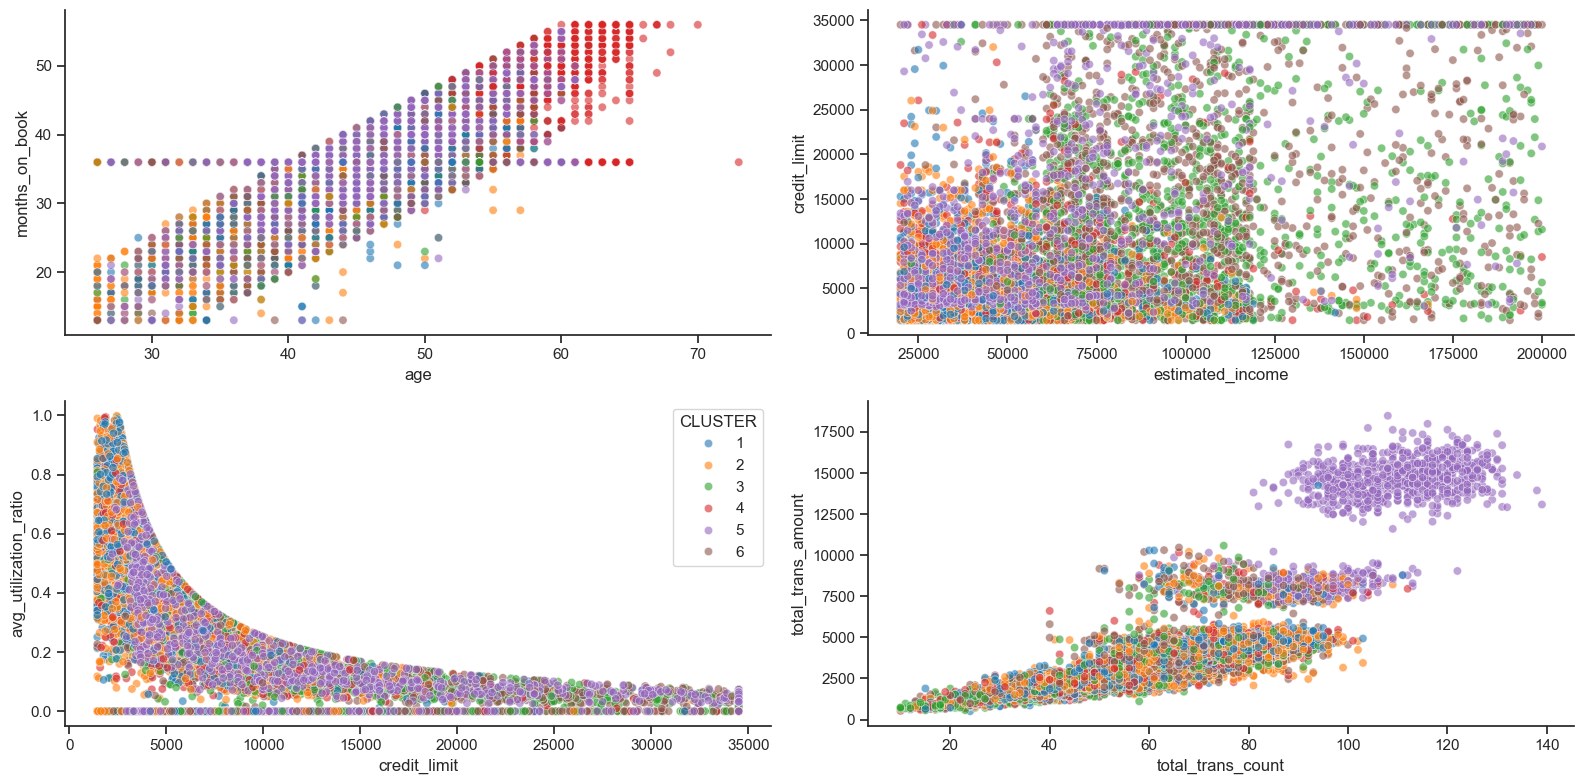

In [55]:
# Create a 2x2 grid of subplots with a figure size of 16x8 inches
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8)) 

# Plot a scatter plot on the first subplot (ax1) showing the relationship between age and months_on_book, colored by CLUSTER
sns.scatterplot(data=customers_updated, x='age', y='months_on_book', hue='CLUSTER', palette='tab10', alpha=0.6, ax=ax1, legend=False)
# Plot a scatter plot on the second subplot (ax2) showing the relationship between estimated_income and credit_limit, colored by CLUSTER
sns.scatterplot(data=customers_updated, x='estimated_income', y='credit_limit', hue='CLUSTER', palette='tab10', alpha=0.6, ax=ax2, legend=False)
# Plot a scatter plot on the third subplot (ax3) showing the relationship between credit_limit and avg_utilization_ratio, colored by CLUSTER
sns.scatterplot(data=customers_updated, x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', palette='tab10', alpha=0.6, ax=ax3)
# Plot a scatter plot on the fourth subplot (ax4) showing the relationship between total_trans_count and total_trans_amount, colored by CLUSTER
sns.scatterplot(data=customers_updated, x='total_trans_count', y='total_trans_amount', hue='CLUSTER', palette='tab10', alpha=0.6, ax=ax4, legend=False)

# Adjust subplot parameters to fit the figure area and avoid overlapping content
plt.tight_layout()
# Display the figure with all the subplots
plt.show()

We can draw some early conclusions considering only the numeric variables.

For instance, Cluster 5 has the highest amount of money transitioned, while Cluster 1 & 2 have the lowest credit limit and estimated income and the highest utilization rate. Cluster 6 has the highest credit limit. Older clients are grouped in Cluster 4.

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

In [56]:
# Add a new column 'CLUSTER' to the DataFrame 'customer' to store cluster assignments
# The cluster labels are incremented by 1 to avoid having a cluster label of 0
customer['CLUSTER'] = clusters + 1

# Display the frequency of each cluster assignment in the 'CLUSTER' column
# This will show how many customers are assigned to each cluster
customer['CLUSTER'].value_counts()

CLUSTER
2    2411
1    2083
3    1718
6    1695
4    1252
5     968
Name: count, dtype: int64

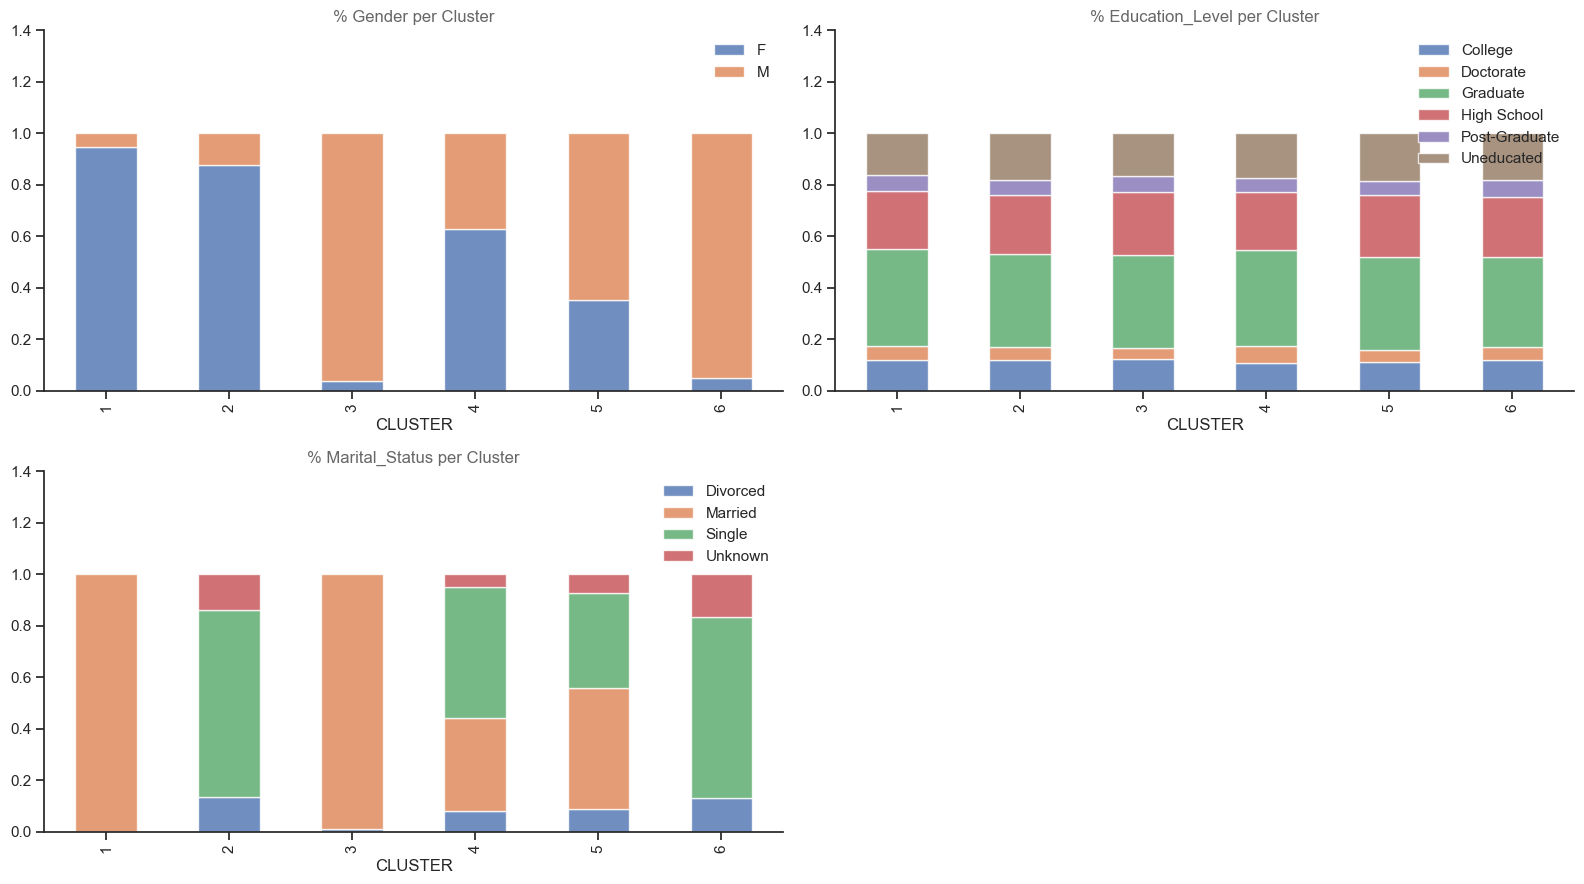

In [57]:
# Identify all columns in the DataFrame 'customer' that have a data type of 'object' (i.e., categorical columns)
categorical = [col for col in customer.columns if customer[col].dtype in ['object']]

# Create subplots: the number of rows is determined by the number of categorical columns divided by 2 (plus one if there's an odd number of columns),
# and there are 2 columns of subplots per row. The figure size is set to 16x9 inches.
fig, axes = plt.subplots(nrows=(len(categorical) // 2) + (len(categorical) % 2), ncols=2, figsize=(16, 9))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Iterate over each categorical column and its corresponding axis
for i, column in enumerate(categorical):
    # Create a crosstab DataFrame that counts occurrences of each category in 'column' for each 'CLUSTER'.
    # Normalize by index to get proportions.
    crosstab_df = pd.crosstab(index=customer['CLUSTER'], columns=customer[column], values=customer[column], aggfunc='size', normalize='index')
    
    # Plot a stacked bar chart of the crosstab DataFrame on the current axis
    ax = axes[i]
    crosstab_df.plot.bar(stacked=True, ax=ax, alpha=0.8)
    
    # Set the title of the subplot, with a slight transparency
    ax.set_title(f'% {column.title()} per Cluster', alpha=0.7)
    
    # Set the y-axis limit to ensure all plots have a consistent scale
    ax.set_ylim(0, 1.4)
    
    # Hide the legend frame for a cleaner look
    ax.legend(frameon=False)
    
    # Remove x-axis grid lines
    #ax.xaxis.grid(False)

# If the number of categorical columns is odd, remove the empty subplot at the end
if len(categorical) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust subplot parameters to ensure everything fits neatly within the figure area
plt.tight_layout()

# Display the figure with all subplots
plt.show()

Considering the categorical variables, we notice that the education level is well divided between clusters.

In other highlights, Cluster 1 & 3 are composed entirely of married people. Cluster 3 & 6 are almost completely male and Cluster 1 & 2 are almost completely female.

#### Conclusion

As demanded by the company, we now have listed the most important characteristics of each cluster. We could also some suggestions and insights into each one of them.

In the end, we have the list of customers with a cluster assigned to each one.

`Cluster 1`
- Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.
- Insight: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

`Cluster 2`
- Mostly women; most single people; low estimated income, low credit limit, low amount transitioned, high utilization rate.
- Insight: Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.

`Cluster 3`
- Characteristics: Mostly men; all married; low amount transitioned; low utilization rate; mid-high estimated income; high credit limit.
- Insight: People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it.

`Cluster 4`
- Characteristics: Gender well divided; mostly single and married; high age, low dependent count, long time customers, low credit limit, low amount transitioned, mid-high utilization rate.
- Insight: Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

`Cluster 5`
- Characteristics: Mostly men; mostly single and married; high credit limit; high amount transitioned; high number of transactions; mid utilization rate.
- Insight: Single or married men with high credit limit and high number of transactions but mid estimated income

`Cluster 6`
- Characteristics: Mostly men; mostly single; mid-high estimated income; high credit limit; low amount transitioned; low utilization rate.
- Insight: Mostly single men with mid-high estimated income and high credit limit who dont buy much.

In [58]:
# List of customers and clusters
customer[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,3
1,818770008,2
2,713982108,3
3,769911858,2
4,709106358,3
...,...,...
10122,772366833,5
10123,710638233,2
10124,716506083,1
10125,717406983,6
